<a href="https://colab.research.google.com/github/ftk1000/GraphNeuralNets/blob/main/NetworkX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NetworkX

NetworkX is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and function of complex networks.

With NetworkX you can load and store networks in standard and nonstandard data formats, generate many types of random and classic networks, analyze network structure, build network models, design new network algorithms, draw networks, and much more.

Library documentation: <a>https://networkx.github.io/</a>

In [1]:
import networkx as nx
G = nx.Graph()

In [2]:
# basic add nodes
G.add_node(1)
G.add_nodes_from([2, 3])

In [3]:
# add a group of nodes at once
H = nx.path_graph(10)
G.add_nodes_from(H)

In [7]:
# add another graph itself as a node
G.add_node(H)
G.add_edge(1, 2)

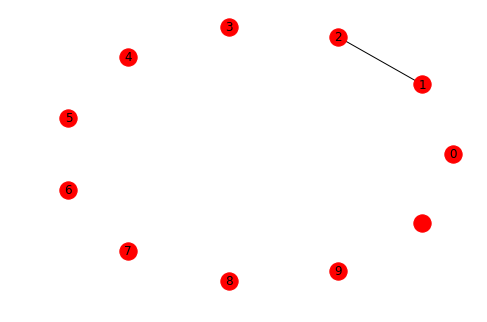

In [8]:
# basic graph drawing capability
%matplotlib inline
import matplotlib.pyplot as plt
# nx.draw(G)
nx.draw_circular(G, with_labels=True)


In [5]:
# add edges using similar methods
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)
G.add_edges_from([(1, 2), (1, 3)])
G.add_edges_from(H.edges())

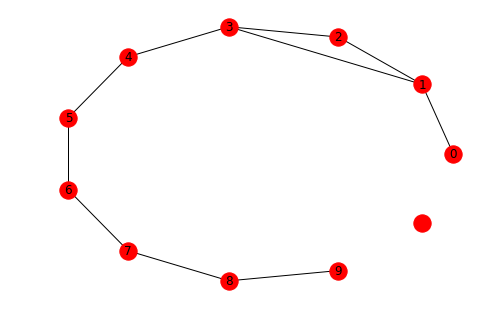

In [6]:
# basic graph drawing capability
%matplotlib inline
import matplotlib.pyplot as plt
# nx.draw(G)
nx.draw_circular(G, with_labels=True)

In [7]:
# can also remove or clear
G.remove_node(H)
G.clear()

In [25]:
# repeats are ignored
G.add_edges_from([(1,2),(1,3)])
G.add_node(1)
G.add_edge(1,2)
G.add_edge(3,2)

G.add_node('spam' )       # adds node "spam"
G.add_nodes_from('spam') # adds 4 nodes: 's', 'p', 'a', 'm'

G.add_edge(1,'spam')
G.add_edge('a','spam')

In [26]:
# get the number of nodes and edges
G.number_of_nodes(), G.number_of_edges()

(16, 5)

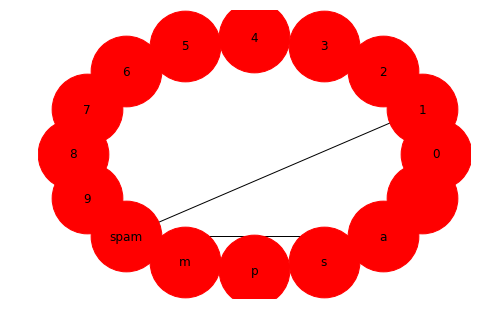

In [31]:
# basic graph drawing capability
%matplotlib inline
import matplotlib.pyplot as plt
# nx.draw(G)
nx.draw_circular(G, with_labels=True, node_size=5000)

In [11]:
# access graph edges
G[1]

AtlasView({2: {}, 3: {}})

In [12]:
G[1][2]

{}

In [13]:
# set an attribute of an edge
G.add_edge(1,3)
G[1][3]['color'] = 'blue'

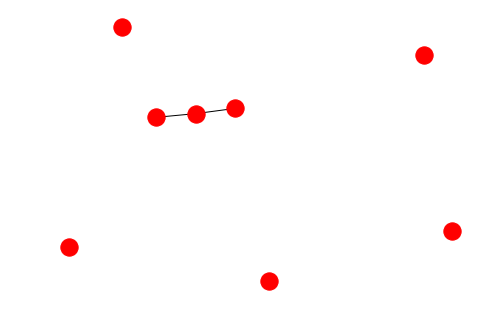

In [14]:
# basic graph drawing capability
%matplotlib inline
import matplotlib.pyplot as plt
nx.draw(G)

# From https://networkx.org/documentation/stable/auto_examples/drawing/plot_multipartite_graph.html#sphx-glr-auto-examples-drawing-plot-multipartite-graph-py


In [32]:
import itertools
import matplotlib.pyplot as plt
import networkx as nx

from networkx.utils import pairwise

subset_sizes = [5, 5, 4, 3, 2, 4, 4, 3]
subset_color = [
    "gold",
    "violet",
    "violet",
    "violet",
    "violet",
    "limegreen",
    "limegreen",
    "darkorange",
]


def multilayered_graph(*subset_sizes):
    extents = pairwise(itertools.accumulate((0,) + subset_sizes))
    layers = [range(start, end) for start, end in extents]
    G = nx.Graph()
    for (i, layer) in enumerate(layers):
        G.add_nodes_from(layer, layer=i)
    for layer1, layer2 in pairwise(layers):
        G.add_edges_from(itertools.product(layer1, layer2))
    return G


G = multilayered_graph(*subset_sizes)
color = [subset_color[data["layer"]] for v, data in G.nodes(data=True)]
pos = nx.multipartite_layout(G, subset_key="layer")
plt.figure(figsize=(8, 8))
nx.draw(G, pos, node_color=color, with_labels=False)
plt.axis("equal")
plt.show()

AttributeError: ignored

In [15]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adjacency_iter():
    for nbr, eattr in nbrs.items():
        data = eattr['weight']
        if data < 0.5: print('(%d, %d, %.3f)' % (n, nbr, data))

AttributeError: ignored

In [ ]:
# graph attribte
G = nx.Graph(day='Friday')
G.graph

{'day': 'Friday'}

In [ ]:
# modifying an attribute
G.graph['day'] = 'Monday'
G.graph

{'day': 'Monday'}

In [ ]:
# node attributes
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.node[1]['room'] = 714
G.nodes(data=True)

NodeDataView({1: {'room': 714, 'time': '5pm'}, 3: {'time': '2pm'}})

In [ ]:
# edge attributes (weight is a special numeric attribute)
G.add_edge(1, 2, weight=4.7)
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2 ,{'color': 'blue'}), (2, 3, {'weight' :8})])
G[1][2]['weight'] = 4.7
G.edge[1][2]['weight'] = 4

AttributeError: ignored

In [ ]:
# directed graph
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2 ,0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')

0.5

In [ ]:
DG.degree(1, weight='weight')

1.25

In [ ]:
DG.successors(1)

<dictionary-keyiterator at 0x7f424fe73050>

In [ ]:
DG.predecessors(1)

<dictionary-keyiterator at 0x7f424fe73110>

In [ ]:
# convert to undirected graph
H = nx.Graph(G)

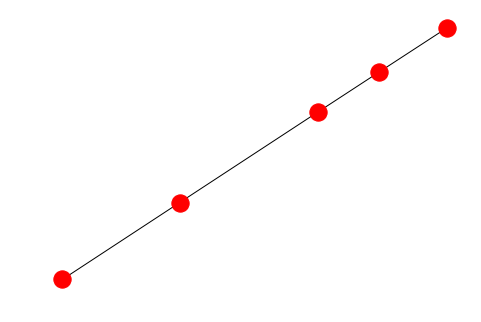

In [ ]:
# basic graph drawing capability
%matplotlib inline
import matplotlib.pyplot as plt
nx.draw(G)